## r(data,data)

In [1]:
host = 'SYNPAI' #'Mac' #'habanero'
if host == 'habanero':
    resultdir = '/rigel/issa/users/Tahereh/Results/'
    
elif host == 'Mac':
    resultdir ='/Users/tahereh/Documents/Results/'
    
elif host == 'SYNPAI':
    resultdir = '/home/tahereh/Documents/Research/Results/Neural-Dynamics/'

In [ ]:
import pickle
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as ss


ImportError: No module named 'h2o4gpu'

In [ ]:
# ----------------
    # Read data
    # ----------------
    # ni,nf,nt = 20,20,10
    # reg_method,reg_params,Collinearity = 'ridge','[]',True

    # ni,nf,nt = 20,20,10
    # reg_method,reg_params,Collinearity = 'PLS',nf,True

    # ni,nf,nt = 200,20,10
    # reg_method,reg_params,Collinearity = 'ridge','[]',True

    # ni,nf,nt = 200,20,10
    # reg_method,reg_params,Collinearity = 'PLS',nf,True
    #
    #
    #
    # file = open(resultdir+'unit_test_%s_%s_ni%d_nf%d_nt%d_collinearity%s.pickle'%\
    #                             (reg_method,reg_params,ni,nf,nt,Collinearity),'rb')
    # data_list = pickle.load(file)
    # file.close()
    r12, r11, r22, r12_reg, r11_reg, r22_reg, r12_reg_sitfit, r11_reg_sitfit, r22_reg_sitfit = data_list
    # ----------------------------------------------------------

    if reg_method == 'ridge':
        color = 'r'
    elif reg_method == 'PLS':
        color = 'gray'
    elif reg_method == 'OMP':
        color = 'blue'

    fig = plt.figure(figsize=[12, 5])
    ax0 = fig.add_axes([0.1, 0.11, 0.25, 0.70])
    ax1 = fig.add_axes([0.4, 0.11, 0.25, 0.70])
    ax2 = fig.add_axes([0.7, 0.11, 0.25, 0.70])

    ax0.scatter(np.sqrt(r11.mean(1)*r22.mean(1)), r12.mean(1), color = 'k', label ='Nom. vs. Denom.')
    ax0.scatter(r22.mean(1), r11.mean(1), color=color, label='LHS vs. RHS')
    ax0.plot([0, 1], [0, 1], ls='--', color='gray')

    if reg_method != 'OMP':
        ax1.scatter(np.sqrt(r11_reg.mean(1)*r22_reg.mean(1)), r12_reg.mean(1), color='k',
                    label='Nom. vs. Denom.')
        ax1.scatter(r22_reg.mean(1), r11_reg.mean(1), color=color, label='LHS vs. RHS')
        ax1.plot([0, 1], [0, 1], ls='--', color='gray')

    ax2.scatter(np.sqrt(r11_reg_sitfit.mean(1)*r22_reg_sitfit.mean(1)), r12_reg_sitfit.mean(1),
                color='k', marker='x', label='Nom. vs. Denom.')
    ax2.scatter(r22_reg_sitfit.mean(1), r11_reg_sitfit.mean(1), color=color, marker='x',
                label='LHS vs. RHS')
    ax2.plot([0, 1], [0, 1], ls='--', color='gray')

    for ax in [ax0, ax2]:

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[:2], labels[:2], loc='upper left')

    ax0.set_ylabel('r(model,data)_est OR r(model,model)')
    ax1.set_yticks([])
    ax0.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12/np.sqrt(r11*r22)), np.median(r12),
                                                       np.median(r11), np.median(r22)))
    ax0.text(0.0, 0.75, 'inversion', fontsize=14)
    ax0.text(0.0, 0.71, corr_method_for_inv+'corr', fontsize=14)

    if reg_method != 'OMP':
        ax1.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)

        ax1.yaxis.set_ticks_position('left')
        ax1.xaxis.set_ticks_position('bottom')

        handles, labels = ax1.get_legend_handles_labels()
        ax1.legend(handles[:2], labels[:2], loc='upper left')
        ax1.text(0.0, 0.75, 'regression:%s'%reg_method, fontsize=14)
        ax1.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg),                                                   np.median(r11_reg),np.median(r22_reg)))
    else:
        ax1.set_xticks([])
        ax1.axis('off')

        ax0.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
        ax2.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

    print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22)),np.median(r12), np.median(r11), np.median(r22)))
    print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg)))
    ax0.text(0.25, 1.2, '#images = %d, #features = %d, #trials = %d, Collinearity = %s, %s noise'%(ni, nf, nt, Collinearity,noise_dist), fontsize=14)

    ax2.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit)),np.median(r12_reg_sitfit), np.median(r11_reg_sitfit),np.median(r22_reg_sitfit)))
    ax2.text(0.0,0.75,'regression-sitefit', fontsize=14)
    ax2.text(0.0,0.65,'%s'%reg_method, fontsize=14)

    print('Reg-sitefit: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit)),np.median(r12_reg_sitfit), np.median(r11_reg_sitfit), np.median(r22_reg_sitfit)))

    plt.show()
    fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.png'%(reg_method, ni, nf, nt, Collinearity, noise_dist, spearman_brown, corr_method_for_inv), dpi=300)
    fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_%s_SB%s_%s.pdf'%(reg_method, ni, nf, nt, Collinearity, noise_dist, spearman_brown, corr_method_for_inv), dpi=300)


In [7]:
print(time_popfit, time_sitefit)

NameError: name 'time_sitefit' is not defined

Pinv: VarExp=1.000, Num =0.887, LHS= 0.972, RHS=0.815
Reg: VarExp=1.057, Num =1.000, LHS= 0.997, RHS=0.898
Reg-sitefit: VarExp=nan, Num =0.000, LHS= 0.000, RHS=0.000


/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in true_divide


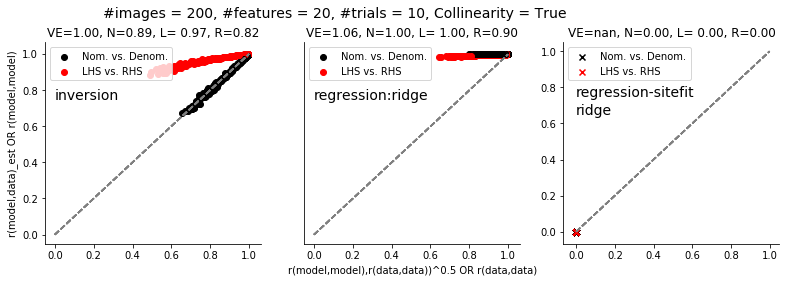

In [8]:
# ----------------
# Read data
# ----------------
# ni,nf,nt = 20,20,10
# reg_method,reg_params,Collinearity = 'ridge','[]',True

# ni,nf,nt = 20,20,10
# reg_method,reg_params,Collinearity = 'PLS',nf,True


# ni,nf,nt = 200,20,10
# reg_method,reg_params,Collinearity = 'ridge','[]',True

# ni,nf,nt = 200,20,10
# reg_method,reg_params,Collinearity = 'PLS',nf,True
# 
# 
# 
# file = open(resultdir+'unit_test_%s_%s_ni%d_nf%d_nt%d_collinearity%s.pickle'%\
#                             (reg_method,reg_params,ni,nf,nt,Collinearity),'rb')
# data_list = pickle.load(file)
# file.close()
# r12,r11,r22,r12_reg,r11_reg,r22_reg,r12_reg_sitfit,r11_reg_sitfit,r22_reg_sitfit = data_list
# ----------------------------------------------------------

if reg_method == 'ridge':
    color = 'r'
elif reg_method == 'PLS':
    color = 'gray'
elif reg_method == 'OMP':
    color = 'blue'
    
    
fig = plt.figure(figsize=[12,4])
ax0 = fig.add_axes([0.1,0.11,0.25,0.70])
ax1 = fig.add_axes([0.4,0.11,0.25,0.70])
ax2 = fig.add_axes([0.7,0.11,0.25,0.70])

for s in range(sd.shape[0]):
    
    ax0.scatter(np.sqrt(r11[s].mean(1)*r22[s].mean(1)), r12[s].mean(1), color = 'k', label ='Nom. vs. Denom.')
    ax0.scatter(r22[s].mean(1), r11[s].mean(1), color=color, label = 'LHS vs. RHS')
    ax0.plot([0, 1], [0, 1], ls='--', color='gray')
    
    if reg_method != 'OMP':
        ax1.scatter(np.sqrt(r11_reg[s].mean(1)*r22_reg[s].mean(1)), r12_reg[s].mean(1), color='k',
                    label='Nom. vs. Denom.')
        ax1.scatter(r22_reg[s].mean(1), r11_reg[s].mean(1), color=color, label='LHS vs. RHS')
        ax1.plot([0, 1], [0, 1], ls='--', color='gray')
    
    ax2.scatter(np.sqrt(r11_reg_sitfit[s].mean(1)*r22_reg_sitfit[s].mean(1)), r12_reg_sitfit[s].mean(1), 
                color='k', marker='x', label='Nom. vs. Denom.')
    ax2.scatter(r22_reg_sitfit[s].mean(1), r11_reg_sitfit[s].mean(1), color=color, marker='x',
                label='LHS vs. RHS')
    ax2.plot([0, 1], [0, 1], ls='--', color='gray')
       
    
for ax in [ax0, ax2]:    
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], loc='upper left')


ax0.set_ylabel('r(model,data)_est OR r(model,model)')
ax1.set_yticks([])
ax0.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12/np.sqrt(r11*r22)), np.median(r12),
                                                   np.median(r11), np.median(r22))) 
ax0.text(0.0, 0.75, 'inversion', fontsize=14)

if reg_method != 'OMP':
    ax1.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[:2], labels[:2], loc='upper left')
    ax1.text(0.0, 0.75, 'regression:%s'%reg_method, fontsize=14)
    ax1.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)),np.median(r12_reg),\
                                                   np.median(r11_reg),np.median(r22_reg)))
else:
    ax1.set_xticks([])
    ax1.axis('off')
   
    ax0.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')
    ax2.set_xlabel('r(model,model),r(data,data))^0.5 OR r(data,data)')

print('Pinv: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12/np.sqrt(r11*r22))\
            ,np.median(r12), np.median(r11), np.median(r22))) 
print('Reg: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%(np.nanmedian(r12_reg/np.sqrt(r11_reg*r22_reg)), np.median(r12_reg), np.median(r11_reg), np.median(r22_reg))) 
ax0.text(0.25,1.2,'#images = %d, #features = %d, #trials = %d, Collinearity = %s'%(ni, nf, nt, Collinearity), fontsize=14)

ax2.set_title('VE=%.2f, N=%.2f, L= %.2f, R=%0.2f'%(np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit))\
                ,np.median(r12_reg_sitfit), np.median(r11_reg_sitfit),np.median(r22_reg_sitfit))) 
ax2.text(0.0,0.75,'regression-sitefit', fontsize=14)
ax2.text(0.0,0.65,'%s'%reg_method, fontsize = 14)

print('Reg-sitefit: VarExp=%.3f, Num =%.3f, LHS= %.3f, RHS=%0.3f'%\
              (np.nanmedian(r12_reg_sitfit/np.sqrt(r11_reg_sitfit*r22_reg_sitfit))\
            ,np.median(r12_reg_sitfit), np.median(r11_reg_sitfit), np.median(r22_reg_sitfit))) 

fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_SB%s.png'%(reg_method, ni, nf, nt, Collinearity, spearman_brown), dpi=300)
fig.savefig(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_Collin%s_SB%s.pdf'%(reg_method, ni, nf, nt, Collinearity, spearman_brown), dpi=300)


In [18]:
r12_reg_sitfit[s].mean(1)

array([0.3351818 , 0.31109495, 0.13738049, 0.18983743, 0.10974442,
       0.17549136, 0.30023373, 0.16801353, 0.19207669, 0.26362999,
       0.15808035, 0.28946347, 0.36123974, 0.29057761, 0.30399473,
       0.22368785, 0.22406926, 0.27056464, 0.24003494, 0.1534856 ])